In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.4 MB/s eta 0:00:00


In [ ]:
#install all needed packages
import sys
import os
import igraph as ig
from igraph import Graph
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity
import numpy as np
from scipy.stats import linregress

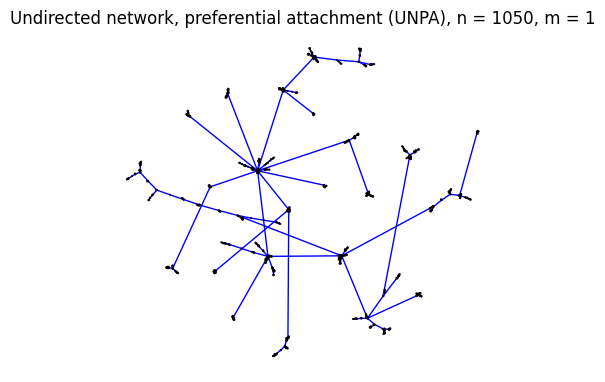

True


In [ ]:
g = ig.Graph(n=1050)
g = g.Barabasi(n=1050, m=1)

fig, ax = plt.subplots(figsize=(5,5))

ax.set_title("Undirected network, preferential attachment (UNPA), n = 1050, m = 1")

ig.plot(
    g,
    target=ax,
    vertex_color='red',
    edge_color='blue',
    vertex_size=1,
    edge_width=1,
)
plt.show()

# Check if the network is connected
print(g.is_connected())

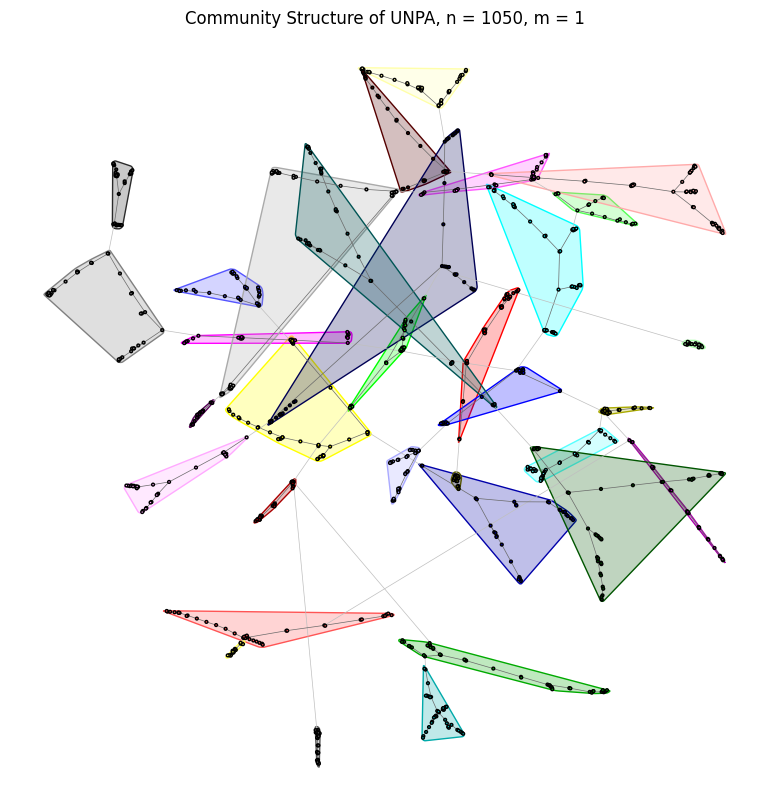

Modularity: 0.937280591348063
Assortativity: -0.2137043156129703


In [ ]:
fg = g.community_fastgreedy()
communities = fg.as_clustering()

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Community Structure of UNPA, n = 1050, m = 1")

ig.plot(
    communities,
    target=ax,
    vertex_size=2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

# Calculate the modularity of the community structure
modularity = g.modularity(fg.as_clustering())
print(f"Modularity: {modularity}")

# Calculate the assortativity coefficient of the network
assortativity = g.assortativity_degree()
print(f"Assortativity: {assortativity}")

In [ ]:
# !apt-get install libcairo2-dev libjpeg-dev libgif-dev
# !pip install pycairo


Modularity (large network): 0.9792237117344464
Assortativity (large network): -0.036547641233989264


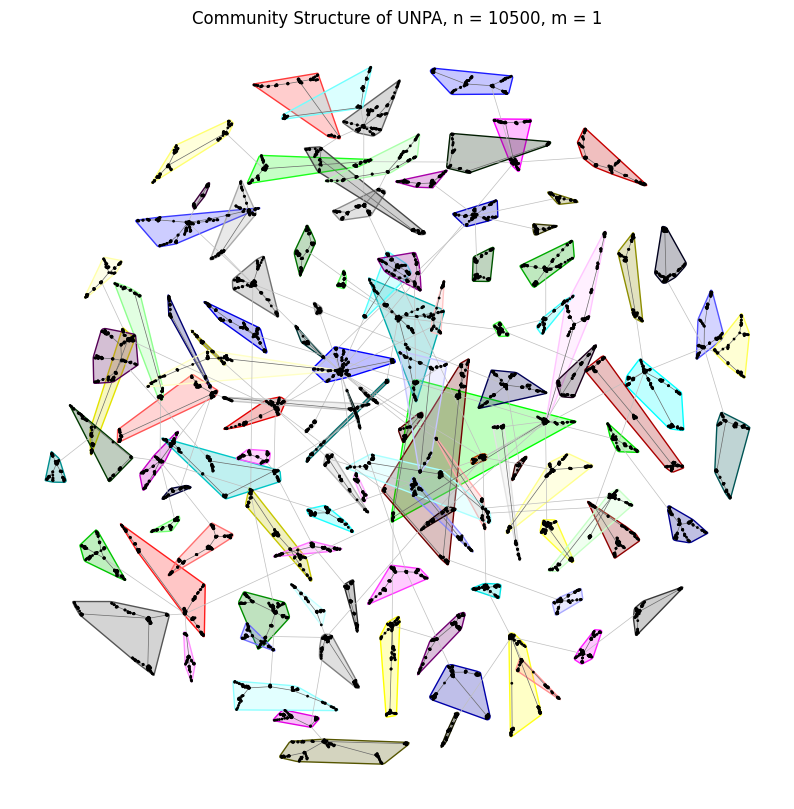

In [ ]:
g_large = ig.Graph.Barabasi(n=10500, m=1)

# Calculate modularity and assortativity for larger network
fg_large = g_large.community_fastgreedy()
com_large = fg_large.as_clustering()
modularity_large = g_large.modularity(fg_large.as_clustering())
assortativity_large = g_large.assortativity_degree()
print("Modularity (large network):", modularity_large)
print("Assortativity (large network):", assortativity_large)

# Plot the network
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Community Structure of UNPA, n = 10500, m = 1")

ig.plot(
    com_large,
    target=ax,
    vertex_size=2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

<ipython-input-41-15f05d74c0f0>:12: RuntimeWarning: divide by zero encountered in log2
  y = np.log2(deg_dist)[non_zero_idxs]


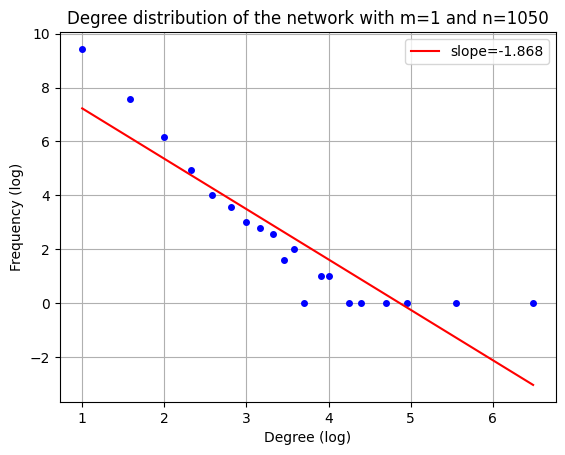

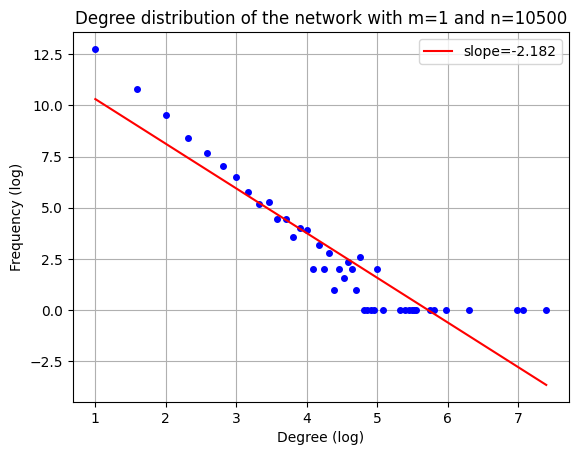

In [ ]:
def plot_degree_distribution(m, n, g=None):
    if g is None:
        g = nx.barabasi_albert_graph(n, m=m)
    deg_dist = np.array(list(nx.degree_histogram(g)))
    non_zero_idxs = np.nonzero(deg_dist)
    x = np.log2(np.arange(1, len(deg_dist)+1))[non_zero_idxs]
    y = np.log2(deg_dist)[non_zero_idxs]
    plt.plot(x, y, 'bo', markersize=4)
    plt.xlabel('Degree (log)')
    plt.ylabel('Frequency (log)')
    plt.title(f"Degree distribution of the network with m={m} and n={n}")
    plt.grid(True)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, slope*x + intercept, 'r-', label=f'slope={slope:.3f}')
    plt.legend()
    plt.show()

plot_degree_distribution(m=1, n=1050)
plot_degree_distribution(m=1, n=10500)


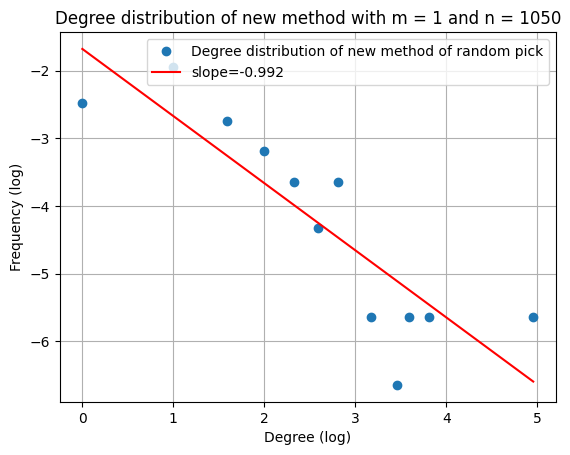

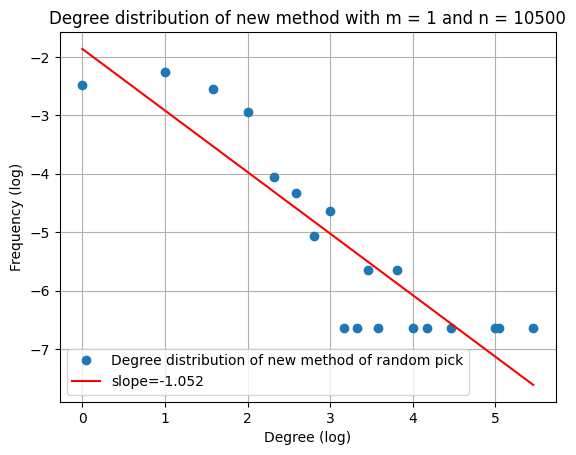

In [ ]:
def plot_new_degree_distribution(m, n, n_sample=100):
    g = ig.Graph.Barabasi(n, m=m, directed=False)
    degs = np.zeros((n_sample, 1))

    for i in range(n_sample):
        sample_node = np.random.randint(0, n)
        neighs = g.neighbors(sample_node)
        sample_neighbor = np.random.choice(neighs, 1)[0]
        degs[i, 0] = g.degree(sample_neighbor)

    deg_dist = np.bincount(degs[:, 0].astype(int))
    x = np.log2(np.arange(len(deg_dist))[deg_dist != 0])
    y = np.log2(deg_dist[deg_dist != 0] / n_sample)
    
    plt.plot(x, y, 'o', label='Degree distribution of new method of random pick')
    plt.title(f"Degree distribution of new method with m = {m} and n = {n}")
    plt.xlabel('Degree (log)')
    plt.ylabel('Frequency (log)')
    plt.grid()
    
    linear_model = np.polyfit(x, y, 1)
    plt.plot(x, np.polyval(linear_model, x), 'r-', label=f'slope={linear_model[0]:.3f}')
    
    plt.legend()
    plt.show()

plot_new_degree_distribution(m=1, n=1050)
plot_new_degree_distribution(m=1, n=10500)

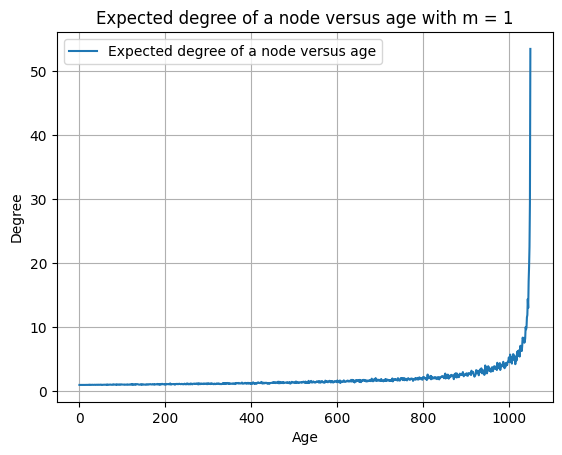

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def plot_relation(m, n=1050, n_trail=100):
    ages = np.zeros((n, 1))
    for i in range(1, n_trail+1):
        g = nx.powerlaw_cluster_graph(n=n, m=m, p=0.05)
        degrees = [val for (node, val) in g.degree()]
        ages = ages + np.array(degrees).reshape(-1, 1)
    ages = ages / n_trail
    plt.plot(
        np.arange(n-1, -1, -1),
        ages,
        label="Expected degree of a node versus age",
    )
    plt.title("Expected degree of a node versus age with m = {}".format(m))
    plt.xlabel("Age")
    plt.ylabel("Degree")
    plt.grid()
    plt.legend()
    plt.show()

plot_relation(m=1)

<ipython-input-23-9356024d86af>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(groups.values()) + 1)


Modularity: 0.919


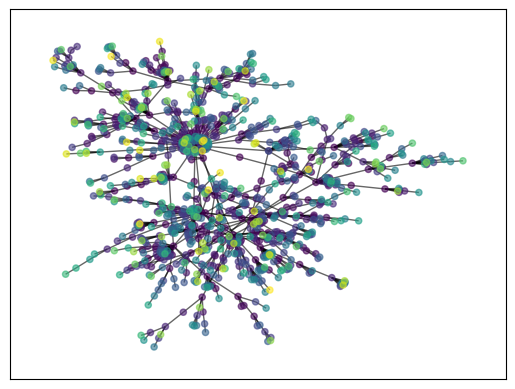

In [ ]:
def plot_communities(g):
    communities = greedy_modularity_communities(g)
    groups = dict()
    for i, comm in enumerate(communities):
        for node in comm:
            groups[node] = i

    pos = nx.spring_layout(g, seed=42)
    cmap = plt.cm.get_cmap('viridis', max(groups.values()) + 1)
    nx.draw_networkx(g, pos=pos, node_size=20, with_labels=False, alpha=0.6, node_color=list(groups.values()), cmap=cmap)
    modularity_score = modularity(g, communities)
    print(f"Modularity: {modularity_score:.3f}")

g = nx.barabasi_albert_graph(1050, m=1, seed=42)

plot_communities(g)

<ipython-input-23-9356024d86af>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(groups.values()) + 1)


Modularity: 0.828


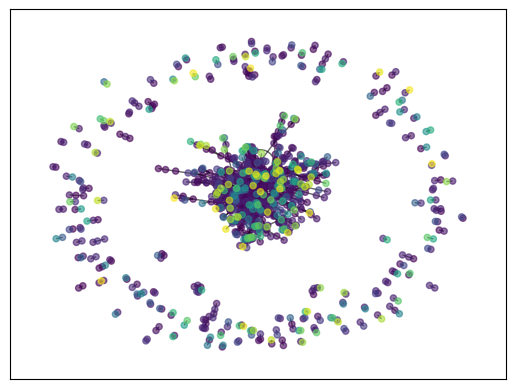

In [ ]:
g_new = nx.configuration_model(list(dict(g.degree()).values()), create_using=nx.Graph())
g_new = nx.Graph(g_new)  # remove parallel edges
plot_communities(g_new)


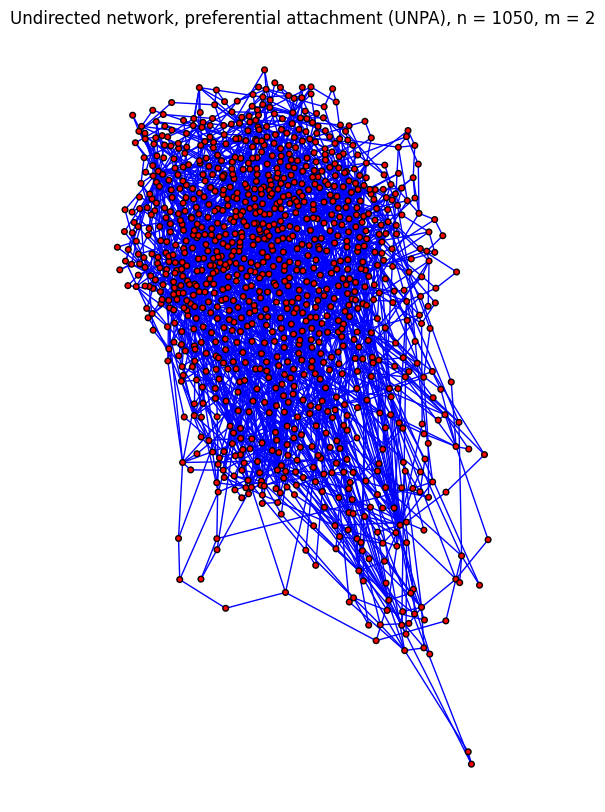

True


In [ ]:
g = ig.Graph(n=1050)
g = g.Barabasi(n=1050, m=2)

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Undirected network, preferential attachment (UNPA), n = 1050, m = 2")

ig.plot(
    g,
    target=ax,
    vertex_color='red',
    edge_color='blue',
    vertex_size=0.3,
    edge_width=1,
)
plt.show()

# Check if the network is connected
print(g.is_connected())

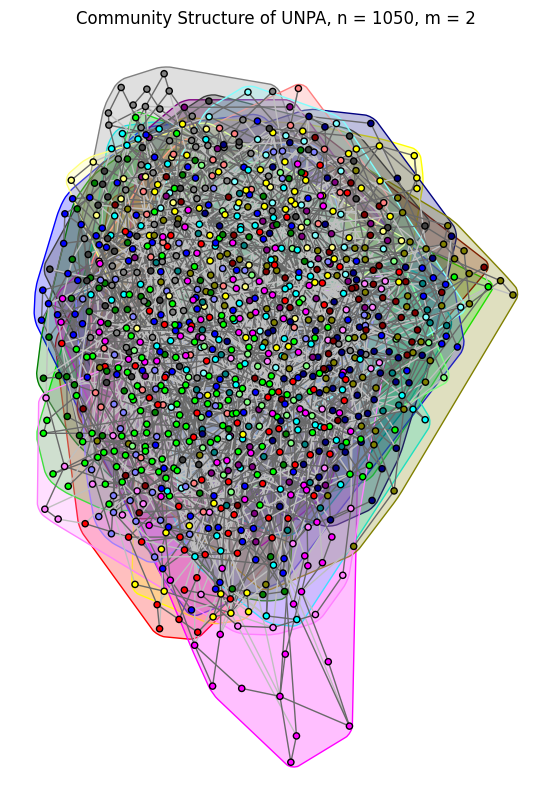

Modularity: 0.5263422165188637
Assortativity: -0.05163807641046217


In [ ]:
#m =2 and n = 1050
fg = g.community_fastgreedy()
communities = fg.as_clustering()

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Community Structure of UNPA, n = 1050, m = 2")

ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=1,
    mark_groups = True
)
plt.show()

# Calculate the modularity of the community structure
modularity = g.modularity(fg.as_clustering())
print(f"Modularity: {modularity}")

# Calculate the assortativity coefficient of the network
assortativity = g.assortativity_degree()
print(f"Assortativity: {assortativity}")

Modularity (large network): 0.5330937653437401
Assortativity (large network): -0.005478858614526075


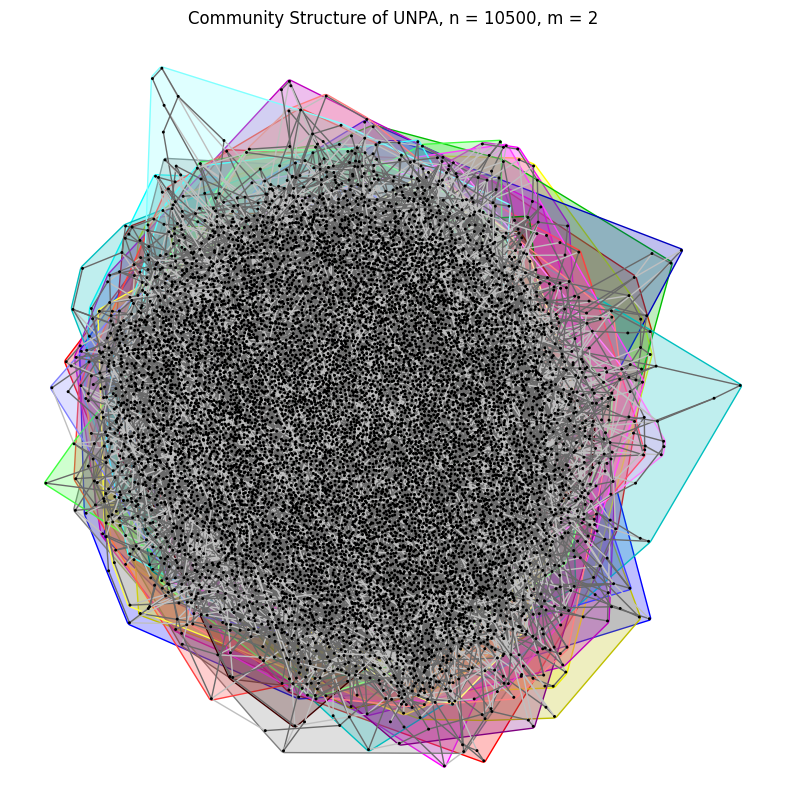

In [ ]:
#m =2 and n = 10500
g_large = ig.Graph.Barabasi(n=10500, m=2)

# Calculate modularity and assortativity for larger network
fg_large = g_large.community_fastgreedy()
com_large = fg_large.as_clustering()
modularity_large = g_large.modularity(fg_large.as_clustering())
assortativity_large = g_large.assortativity_degree()
print("Modularity (large network):", modularity_large)
print("Assortativity (large network):", assortativity_large)

# Plot the network
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Community Structure of UNPA, n = 10500, m = 2")

ig.plot(
    com_large,
    target=ax,
    vertex_size=0.2,
    edge_width=1,
    mark_groups = True
)
plt.show()

<ipython-input-41-15f05d74c0f0>:12: RuntimeWarning: divide by zero encountered in log2
  y = np.log2(deg_dist)[non_zero_idxs]


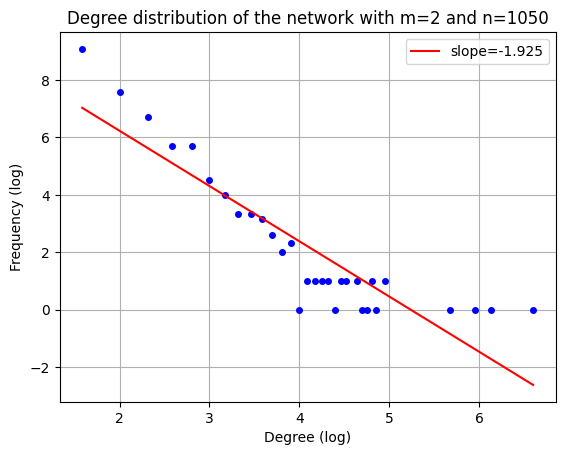

In [ ]:
plot_degree_distribution(m=2, n=1050)

<ipython-input-41-15f05d74c0f0>:12: RuntimeWarning: divide by zero encountered in log2
  y = np.log2(deg_dist)[non_zero_idxs]


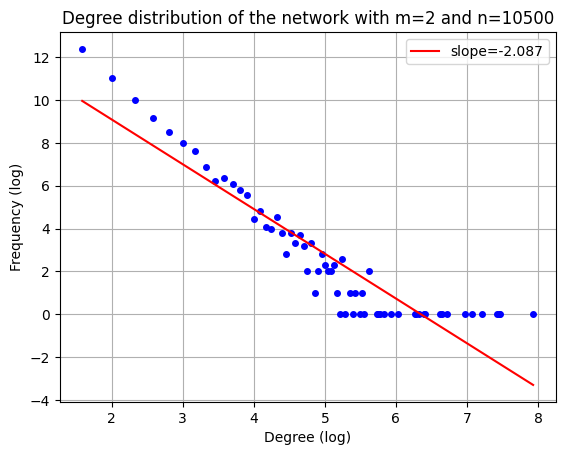

In [ ]:
plot_degree_distribution(m=2, n=10500)

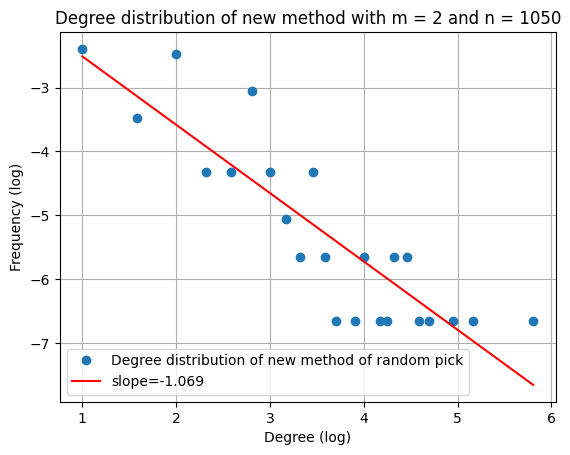

In [ ]:
plot_new_degree_distribution(m=2, n=1050)

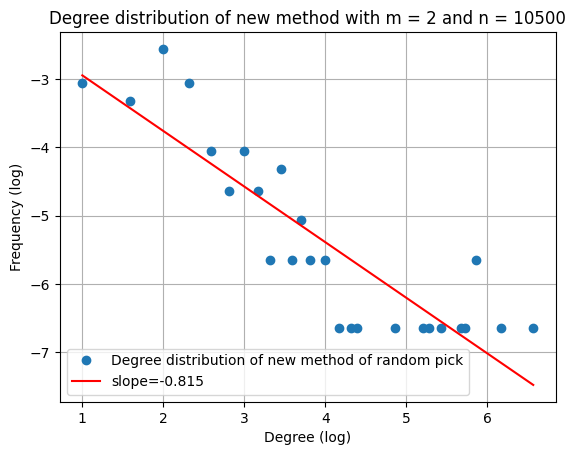

In [ ]:
plot_new_degree_distribution(m=2, n=10500)

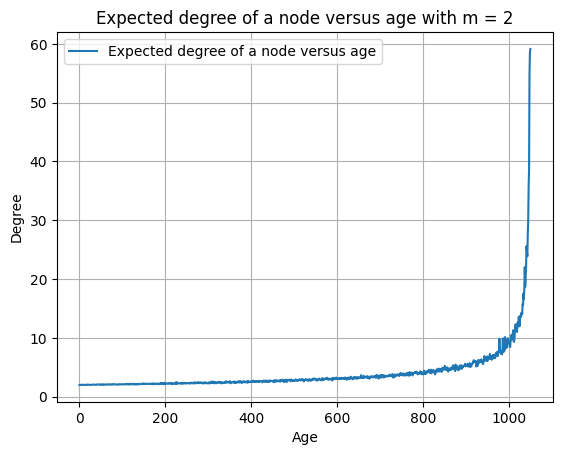

In [ ]:
plot_relation(m=2)

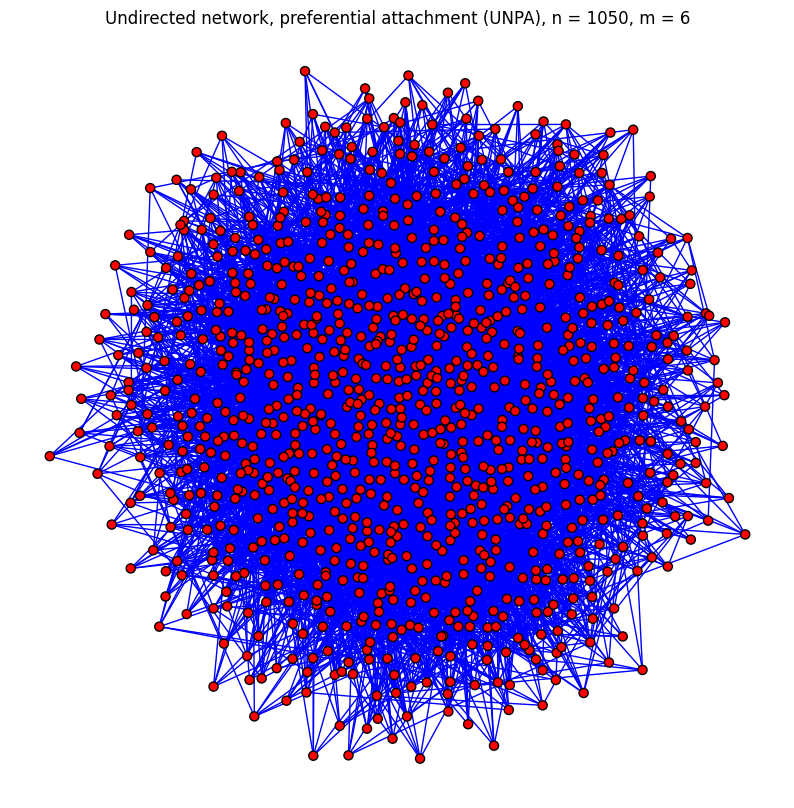

True


In [ ]:
g = ig.Graph(n=1050)
g = g.Barabasi(n=1050, m=6)

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Undirected network, preferential attachment (UNPA), n = 1050, m = 6")

ig.plot(
    g,
    target=ax,
    vertex_color='red',
    edge_color='blue',
    vertex_size=0.1,
    edge_width=1,
)
plt.show()

# Check if the network is connected
print(g.is_connected())

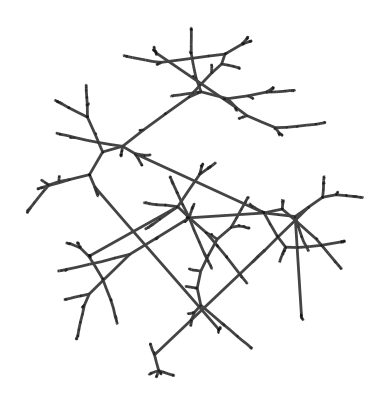

Power law exponent: 2.818456654359744


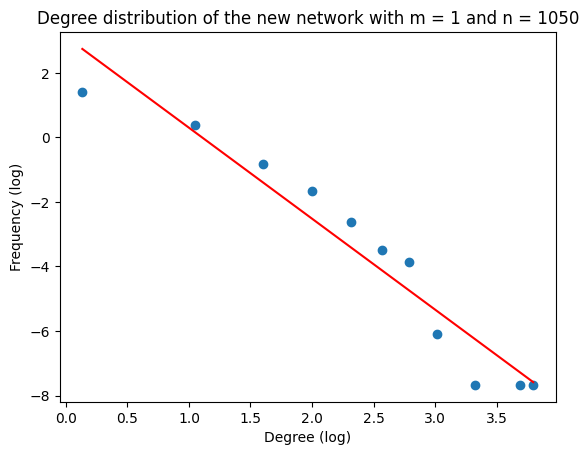

In [ ]:
import igraph as ig


n = 1050  
m = 1
pa_exp = 1
aging_exp = -1
zero_age = 1 
directed = False

# g = ig.Graph.Barabasi(n, m, power=pa_exp, aging=aging_exp, zero_age=zero_age, directed=directed)
import igraph as ig
import random

def sample_pa_age(n, m, pa_exp=1, aging_exp=-1, directed=False):
    g = ig.Graph()
    g.add_vertices(n)

    for i in range(m):
        g.add_edge(i, m)
    
    for i in range(m + 1, n):
        degrees = g.degree(range(i))
        ages = [i - x for x in range(i)]
        
        pa_probs = [d ** pa_exp for d in degrees]
        
        aging_probs = [a ** aging_exp for a in ages]
        
        total_probs = [pa * ag for pa, ag in zip(pa_probs, aging_probs)]
        total_probs_sum = sum(total_probs)
        normalized_probs = [p / total_probs_sum for p in total_probs]
        
        selected_nodes = random.choices(range(i), weights=normalized_probs, k=m)
        
        for node in selected_nodes:
            g.add_edge(i, node)
            
    return g



g = sample_pa_age(n, m, pa_exp, aging_exp, directed)
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax
)

plt.show()

degrees = g.degree()

frequency, bin_edges = np.histogram(degrees, bins='auto', density=True)

non_zero_indices = frequency > 0
frequency = frequency[non_zero_indices]
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_centers = bin_centers[non_zero_indices]

bin_centers = np.log2(bin_centers)
frequency = np.log2(frequency)


plt.plot(bin_centers, frequency, marker='o', linestyle='none')

para = np.polyfit(bin_centers, frequency, 1)
p = np.poly1d(para)
plt.plot(bin_centers, p(bin_centers), color='r')

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(bin_centers, frequency)
print("Power law exponent:", -slope)



# slope, intercept, r_value, p_value, std_err = linregress(bin_centers, frequency)
# plt.plot(bin_centers, slope*bin_centers + intercept, 'r-', label=f'slope={slope:.3f}')
# plt.legend()





plt.xlabel('Degree (log)')
plt.ylabel('Frequency (log)')
plt.title(f"Degree distribution of the new network with m = {m} and n = {n}")
plt.show()




In [ ]:
para

array([-2.79804929,  3.06093148])

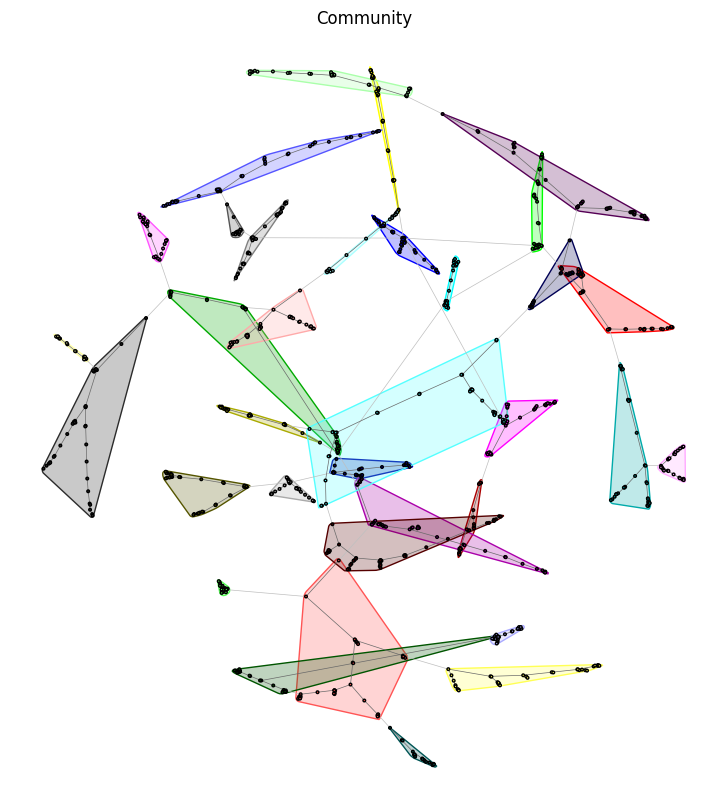

Modularity: 0.9370415875667141


In [ ]:
fg_new = g.community_fastgreedy()
communities = fg_new.as_clustering()
modularity = g.modularity(fg_new.as_clustering())

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Community")

ig.plot(
    communities,
    target=ax,
    vertex_size=2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

print(f"Modularity: {modularity}")